## LADI HARISH KUMAR (20MAI0052)


## DEEP LEARNING AND ITS APPLICATIONS (CSE6037)
#### *ASSIGNMENT 3, TASK 1*



> Write a program to implement the AlexNet model (Note : You can use any publically 
available dataset for testing). While implementing you have to show following things

1.   Display sample input and output images (at least 10 images).
2.  Display the total images in the database, size of the image, no of classes in the  database.
3.  Display the first convolution function kernel filter coefficient values
4.  Display the training accuracy / training error
5.  Display the testing accuracy









# 1. Load the required libraries

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded all libraries")

Loaded all libraries


# 2. Data Loading and Exploration

In [9]:
# modify to fit your system
fpath = '/content/drive/MyDrive/image_3'

In [10]:

random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02087394-Rhodesian_ridgeback', 'n02089867-Walker_hound', 'n02090379-redbone', 'n02089078-black-and-tan_coonhound', 'n02088632-bluetick', 'n02089973-English_foxhound', 'n02088466-bloodhound', 'n02088364-beagle', 'n02088238-basset', 'n02088094-Afghan_hound', 'n02085620-Chihuahua', 'n02086079-Pekinese', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086240-Shih-Tzu'] 

No. of categories =  18


In [11]:
# Display the total images in the database, size of the image, no of classes in the database
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))


No. of images loaded =  3117 
No. of labels loaded =  3117
<class 'list'> <class 'list'>


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3117, 227, 227, 3) 
Labels shape =  (3117,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


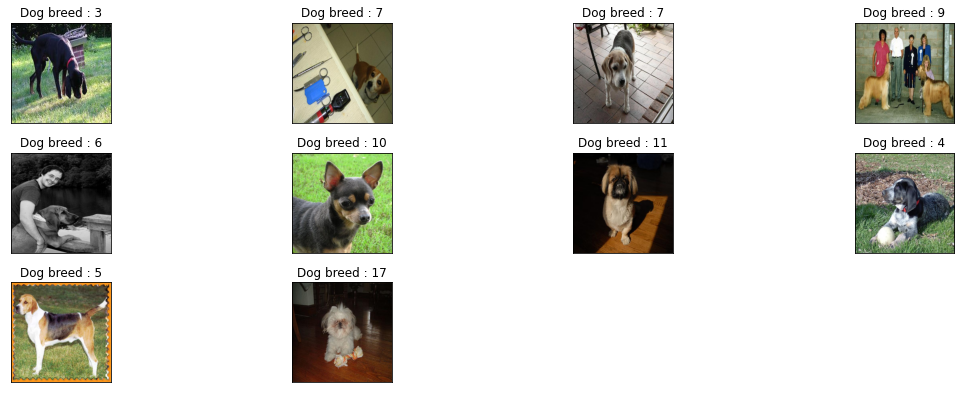

In [13]:
#Display sample input and output images (at least 10 images).
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 9))
    n = 0 
    for i in range(10):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

# 3. Preparing data for training the Alexnet CNN model

In [14]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 3114 3115 3116]

'n' values after shuffling =  [ 679 1809  568 ... 1130 1294  860]


In [15]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (3117, 227, 227, 3) 
Labels shape after shuffling =  (3117,)


In [16]:
#Data Normalization
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (3117, 227, 227, 3)


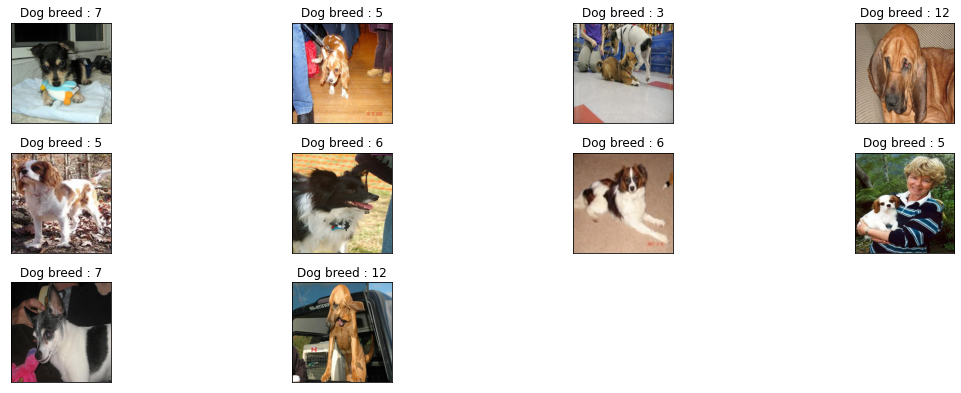

In [ ]:
#Display few images after normalization
display_rand_images(images, labels)

In [17]:
#Split loaded dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2493, 227, 227, 3)
y_train shape =  (2493,)

x_test shape =  (624, 227, 227, 3)
y_test shape =  (624,)


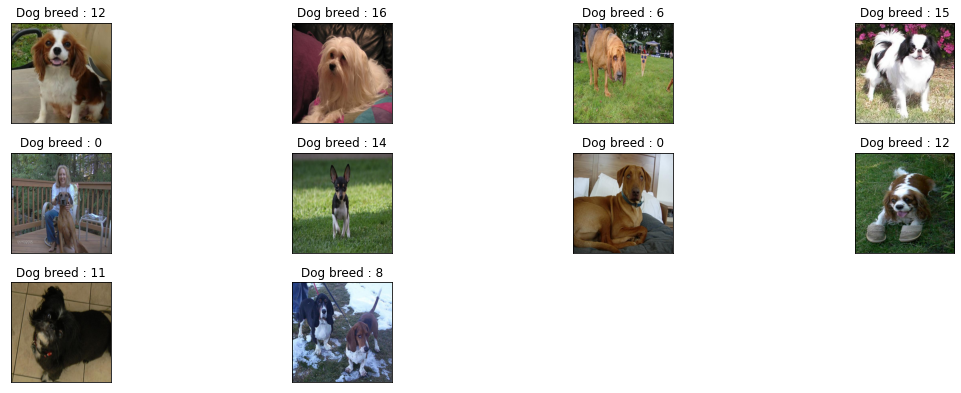

In [18]:
#Display train random images
display_rand_images(x_train, y_train)

# 4. Define Alexnet CNN model

[[[-1.15207732e-02 -1.76690649e-02  1.19254868e-02 ...  4.95253876e-03
   -1.74196344e-02 -6.74950518e-03]
  [ 6.66113757e-03  1.56611111e-02 -2.63280980e-03 ... -1.38075203e-02
   -5.45788743e-03  1.52849909e-02]
  [ 1.15418565e-02  9.87216830e-04  1.21910479e-02 ... -1.09587302e-02
    1.17309596e-02  5.01163304e-03]
  ...
  [-6.69725612e-03 -4.56136093e-03 -3.16081569e-03 ... -8.11517425e-03
   -1.20782601e-02  6.86049648e-03]
  [ 6.11888617e-03 -8.12786818e-03 -1.15489624e-02 ...  1.37658138e-02
    2.72372738e-03 -1.06794285e-02]
  [-5.09217754e-03  6.19705580e-03  1.28801186e-02 ...  1.82827655e-02
   -1.68936662e-02 -2.07972620e-02]]

 [[-3.67784873e-04  8.62447545e-04 -2.22206227e-02 ...  5.28550148e-03
   -9.11179744e-03  1.59980338e-02]
  [-1.68657303e-03 -1.83204785e-02 -1.91980377e-02 ...  2.18299031e-03
    8.38307664e-03  2.20856573e-02]
  [ 2.05188114e-02  7.15602934e-03  1.77863296e-02 ... -1.67471003e-02
    3.28013115e-03 -8.98266956e-03]
  ...
  [ 1.48897786e-02 -1.8

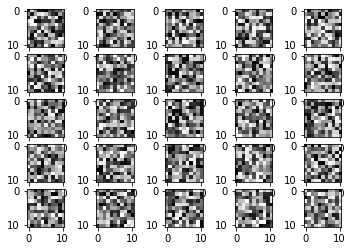

In [19]:
Alexnet=Sequential()

#1 conv layer
x=Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3))
Alexnet.add(x)

xlw = x.get_weights()[0][:,:,0,:]
for i in range(1,26):
    print(xlw)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(xlw[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

#1 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())

#2 conv layer
Alexnet.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())

#3 conv layer
Alexnet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
Alexnet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
Alexnet.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())


Alexnet.add(Flatten())

#1 dense layer
Alexnet.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#2 dense layer
Alexnet.add(Dense(4096,activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#3 dense layer
Alexnet.add(Dense(1000,activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#output layer
Alexnet.add(Dense(20,activation="softmax"))



## Displaying filters

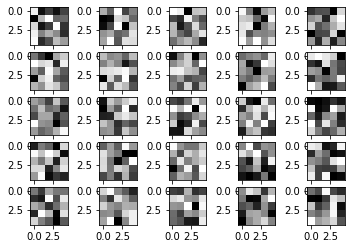

In [20]:

import matplotlib.pyplot as plt

 

ann = Sequential()

x = Conv2D(filters=64,kernel_size=(5,5),input_shape=(32,32,3))

ann.add(x)

 

x1w = x.get_weights()[0][:,:,0,:]

for i in range(1,26):

      plt.subplot(5,5,i)

      plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")

plt.show()

In [22]:

# retrieve weights from the second hidden layer
filters, biases = ann.layers[0].get_weights()


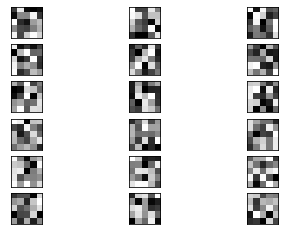

In [29]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ann = plt.subplot(n_filters, 3, ix)
		ann.set_xticks([])
		ann.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
 
 #plt.show()

In [32]:
#cofficient values of first 10 filters of layer 1
print(filters[0][0:10])

[[[-2.96404324e-02  4.93045226e-02  2.04825327e-02  5.29763177e-02
    4.78647798e-02 -3.08113005e-02 -2.95482576e-03  1.75714269e-02
   -4.43288833e-02 -1.01009682e-02  4.87818196e-02  1.54682770e-02
   -4.94624153e-02 -1.91255212e-02  3.54215875e-02 -5.41859455e-02
   -4.37105149e-02 -1.30089633e-02  5.55196255e-02  6.67191297e-03
    5.00769615e-02 -2.81532481e-03  3.41589674e-02 -2.57210322e-02
    6.64528459e-03 -9.41205397e-03 -2.59703025e-03  1.41976103e-02
   -1.87354647e-02  3.30235735e-02 -2.85720751e-02 -3.24448273e-02
   -7.77518377e-03 -4.36986163e-02  5.73236495e-03 -1.05148554e-02
   -7.37692416e-03 -4.18588072e-02 -9.27202776e-03  4.51762229e-02
   -1.07960626e-02  4.31351811e-02  1.04744881e-02 -2.22555548e-03
    1.40342414e-02  5.47370762e-02 -8.02244991e-04  3.14960778e-02
    2.16656178e-02 -3.98328826e-02  3.01283374e-02  8.25461000e-04
    2.70942599e-02 -1.75986439e-04 -1.22940317e-02 -2.56722420e-03
    5.91234714e-02 -5.43691777e-02 -1.67581104e-02 -2.32568346

In [33]:
Alexnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [34]:
#Compile the CNN model
Alexnet.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 5. Train the model

In [36]:
Alexnet.fit(x_train, y_train, epochs=5)

Epoch 1/5
78/78 [==============================] - 197s 3s/step - loss: 2.9977 - accuracy: 0.1400
Epoch 2/5
78/78 [==============================] - 197s 3s/step - loss: 2.9206 - accuracy: 0.1544
Epoch 3/5
78/78 [==============================] - 203s 3s/step - loss: 2.7559 - accuracy: 0.1901
Epoch 4/5
78/78 [==============================] - 200s 3s/step - loss: 2.7110 - accuracy: 0.1994
Epoch 5/5
78/78 [==============================] - 200s 3s/step - loss: 2.5858 - accuracy: 0.2086


In [37]:
#Metrics to evalvuate Loss and accuracy
loss, accuracy = Alexnet.evaluate(x_test, y_test)

20/20 [==============================] - 13s 642ms/step - loss: 3.9270 - accuracy: 0.1827


In [38]:
print(loss,accuracy)


3.926981210708618 0.18269230425357819
